## ANÁLISE EXPLORATÓRIA - HEART DISEASE 

Autora: Maria Helena Siqueira dos Santos

### Objetivo 

O foco desse projeto é fazer uma análise dos dados que através da correlação de variáveis consiga identificar quais fatores influenciam em uma pessoa possuir uma doença cardíaca.

<img src="img/HeartDisease.jpg" style="width:400px; heigth:600px"/>

### Coleta dos Dados
Os dados foram coletados através do Kaggle, no qual contém um arquivo ".csv"contendo informações sobre pessoas que possuem e não possuem doenças cardiacas. 

https://www.kaggle.com/code/andls555/heart-disease-prediction/data

In [58]:
# importando a bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("dados/heart_2020_cleaned.csv")

In [3]:
# lendo as 5 primeiras 
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# lendo as 5 ultimas
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [5]:
# transformarei heartdisease em valor numericos para conseguir melhores comparaçoes 
df['HeartDisease'] = df['HeartDisease'].apply(lambda value: 1 if value == 'Yes' else 0 )

In [6]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,0,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [7]:
# shape 
df.shape 

(319795, 18)

In [8]:
# vendo as colunas do df
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
# vendo os tipos das variavies
df.dtypes

HeartDisease          int64
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

Verificando se existem Missing Values

In [11]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

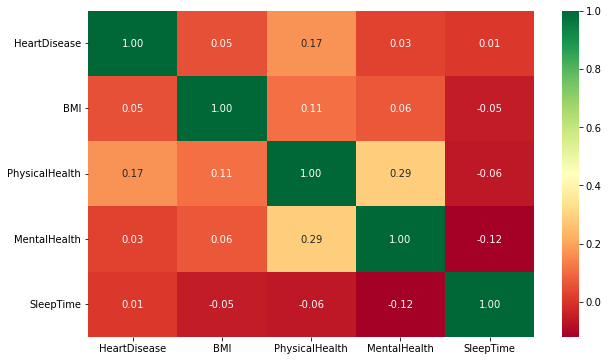

In [12]:
# vendo correlaçao entre a variaveis
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdYlGn")

Analisando parâmetros estatísticos 

In [13]:
df.describe()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000
mean,0.085595,28.325399,3.37171,3.898366,7.097075
std,0.279766,6.356100,7.95085,7.955235,1.436007
min,0.000000,12.020000,0.00000,0.000000,1.000000
25%,0.000000,24.030000,0.00000,0.000000,6.000000
50%,0.000000,27.340000,0.00000,0.000000,7.000000
75%,0.000000,31.420000,2.00000,3.000000,8.000000
max,1.000000,94.850000,30.00000,30.000000,24.000000


### Vendo a distribuição de pessoas que possuem e não possuem problemas cardíacos 

In [41]:
heart_disease = df["HeartDisease"].value_counts()

In [42]:
heart_disease

0    292422
1     27373
Name: HeartDisease, dtype: int64

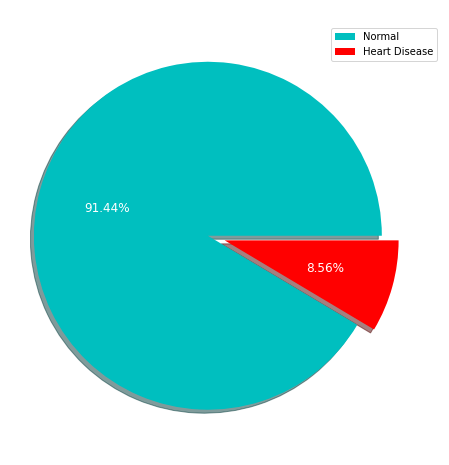

In [72]:
colors = ['c', 'r']
explode = (0.1,0.0)
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.title("Distribuição de pessoas com e sem problemas cardíacos", color="white", size=13)
plt.pie(heart_disease, labels = heart_disease.index, autopct='%1.2f%%', textprops = dict(color ="w", size=12),
shadow=True, colors=colors, explode=explode)
plt.legend(labels = ['Normal', 'Heart Disease'])
plt.show()

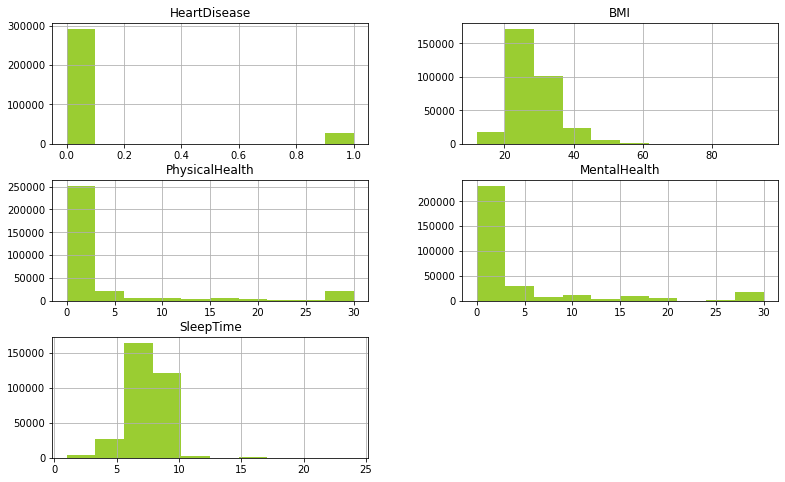

In [71]:
df.hist(figsize=(13,8), color='yellowgreen'); # histograma

## Hipóteses

* HIPÓTESE 1 - Quando a saúde no geral é boa e as horas de sono são boas, a possibilidade de ter um problema cardíaco é menor.

* HIPÓTESE 2 - Pessoas fumantes e pessoas que ingerem alcool são mais propensas a problemas cardíacos.

* HIPÓTESE 3 - Pessoas que praticam atividades fisicas possuem menos chances de ter um problemas cardíaco.

* HIPÓTESE 4 - Pessoas mais velhas são mais propensas a problemas cardíacos.

* HIPÓTESE 5  - A etnia influência na pessoa ter um problemas cardíacos.

* HIPÓTESE 6 - O sexo da pessoa influência nela ter um problema cardíaco.

* HIPÓTESE 7 - Uma pessoa com diabetes e/ou asma possui chances maiores de ter um problema cardíaco.

* HIPÓTESE 8 - Pessoas que tem câncer de pele e/ou doença renal possuem maiores chances de terem problemas cardíacos. 

* HIPÓTESE 9 - Pessoas que tem boa saúde mental e física possuem menores chances de terem problemas cardíacos. 

### HIPÓTESE 1 
Quando a saúde no geral é boa e as horas de sono são boas, a possibilidade de ter um problema cardíaco é menor.

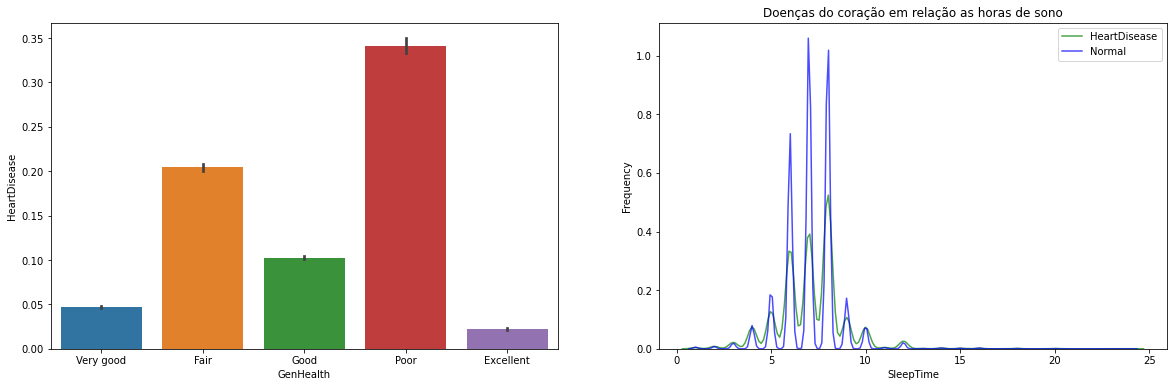

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,6))
sns.barplot(x="GenHealth", y="HeartDisease", data=df, ax=ax1)
sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.7, color="green", label="HeartDisease", ax=ax2)
sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.7, color="blue", label="Normal", ax=ax2)
plt.title('Doenças do coração em relação as horas de sono')
ax2.set_ylabel("Frequency")
ax2.legend()
plt.show()

Vemos que a hipotese é parcialmente verdadeira, já que pessoas que possuem uma saúde melhor contém menos problemas no coração. Porém, vemos que as horas de sono não está relacionada com problemas de coração pois até mesmo pessoas que possuem maiores horas de sono possuem problemas no coração.

### HIPÓTESE 2
Pessoas fumantes e pessoas que ingerem alcool são mais propensas a problemas cardíacos.

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='HeartDisease'>

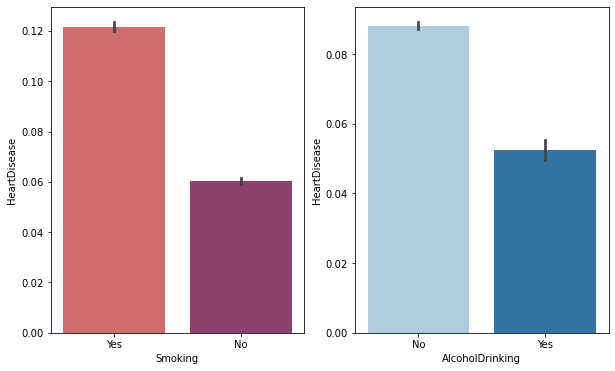

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
sns.barplot(x="Smoking", y="HeartDisease", data=df, ax=ax1, palette="flare")
sns.barplot(x="AlcoholDrinking", y="HeartDisease", data=df, ax=ax2, palette="Paired")

Vemos que fumantes estão mais propensas a terem problemas no coração, porém pessoas que tem costume de ingerir alcool não está tão relacionado com problemas no coração. Então essa hipotese é parcialmente verdadeira.

### HIPÓTESE 3
 Pessoas que praticam atividades físicas possuem menos chances de ter um problema no coração

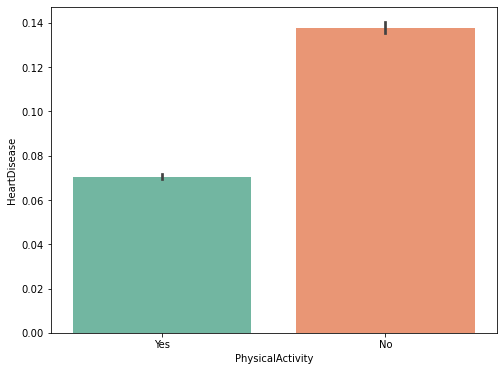

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x="PhysicalActivity", y="HeartDisease", data=df, palette="Set2");

Essa hipotese é verdadeira, já que vemos uma grande quantidade de pessoas que não praticam exercicios fisicos com problemas no coração.

### HIPÓTESE 4 
Pessoas mais velhas são mais propensas a problemas no coração.

* 0 - não apresenta heart disease
* 1 - apresenta heart disease

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

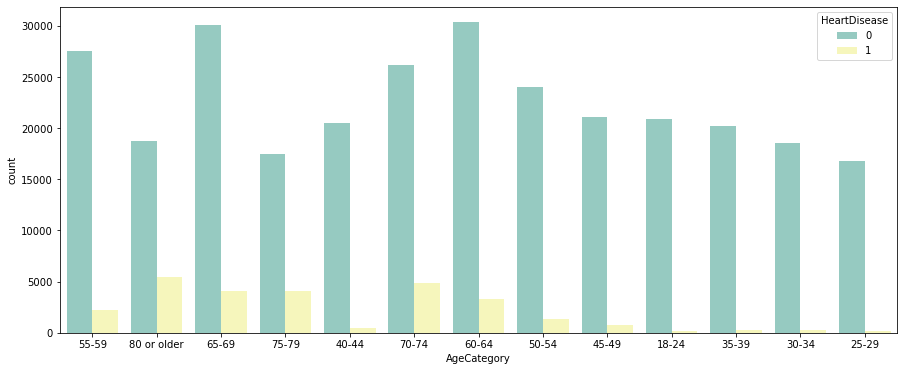

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x="AgeCategory", hue="HeartDisease", data=df, palette="Set3")

Nota-se que pessoas com idades maiores ou iguais a 80 anos são mais propensas a ter problemas no coração. No gráfico, vemos que a menor faixa etária (18-24 anos), é quase isenta a quantidade de pessoas com problemas cardíacos.

### HIPÓTESE 5  
A etnia influencia na pessoa ter um problema no coração.

* 0 - não apresenta heart disease
* 1 - apresenta heart disease

<AxesSubplot:xlabel='Race', ylabel='count'>

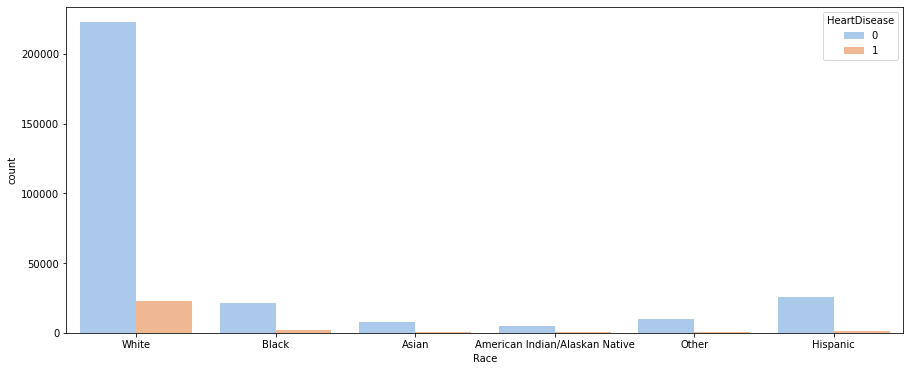

In [82]:
plt.figure(figsize=(15,6))
sns.countplot(x="Race", hue="HeartDisease", data=df, palette="pastel")

De acordo com a contagem, vemos que pessoas brancas possuem mais problemas no coração, o que significa que esta hipótese é verdadeira.

### HIPÓTESE 6 
O sexo da pessoa influência nela ter um problema cardíaco.


<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

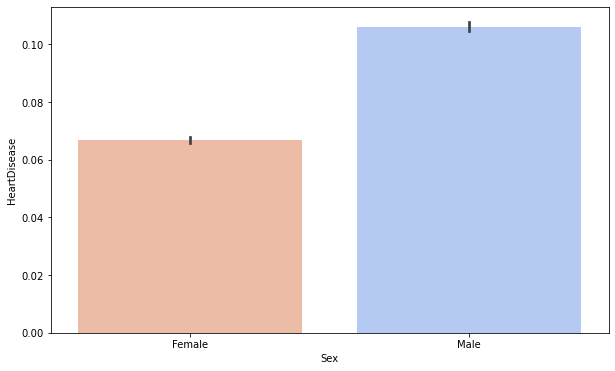

In [91]:
plt.figure(figsize=(10,6))
sns.barplot(x="Sex", y="HeartDisease", data=df, palette="coolwarm_r")

Vemos que pessoas do sexo masculino possuem mais problemas no coração do que pessoas do sexo feminino, sendo assim essa hipótese é verdadeira.

### HIPÓTESE 7 

Uma pessoa com diabetes e/ou asma possui chances maiores de ter um problema cardíaco.

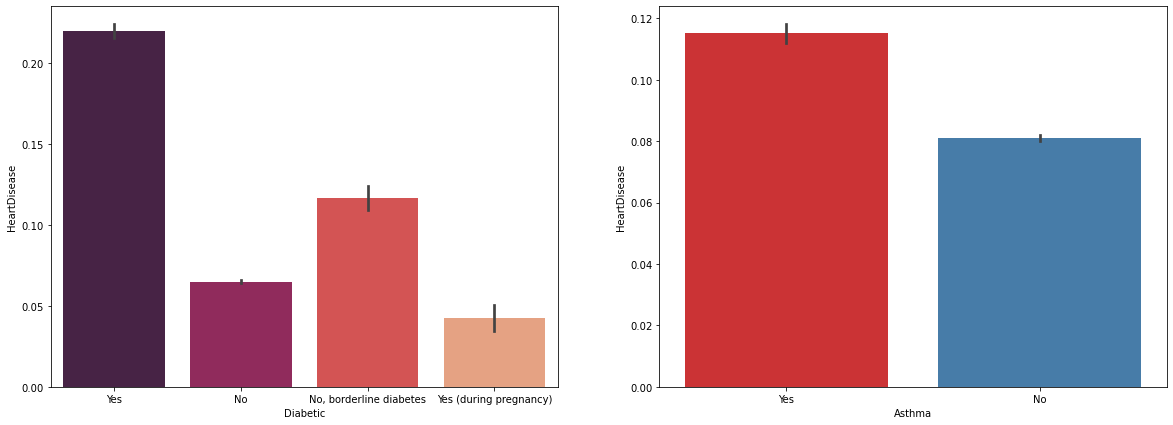

In [79]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,7))
sns.barplot(x="Diabetic", y="HeartDisease", data=df, ax=ax1, palette="rocket");
sns.barplot(x="Asthma", y="HeartDisease", data=df, ax=ax2, palette="Set1");

Essa hipotese é verdadeira, muitas pessoas que tem diabetes e/ou asma também possuem problemas no coração.

### HIPÓTESE 8 

Pessoas que tem câncer de pele e/ou doença renal possuem maiores chances de terem problemas cardíacos.

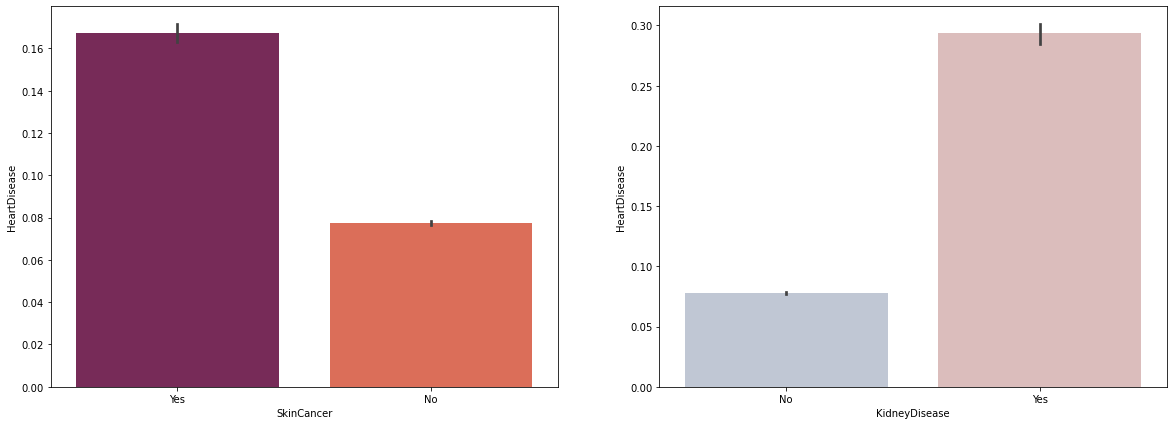

In [78]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,7))
sns.barplot(x="SkinCancer", y="HeartDisease", data=df, ax=ax1, palette="rocket");
sns.barplot(x="KidneyDisease", y="HeartDisease", data=df, ax=ax2,  palette="vlag");

Essa hipótese é verdadeira, já que pessoas com doença renal e/ou câncer de pele aparencem também com problemas cardíacos.

### HIPÓTESE 9 
Pessoas que tem boa saúde mental e física possuem menores chances de terem problemas no coração. 

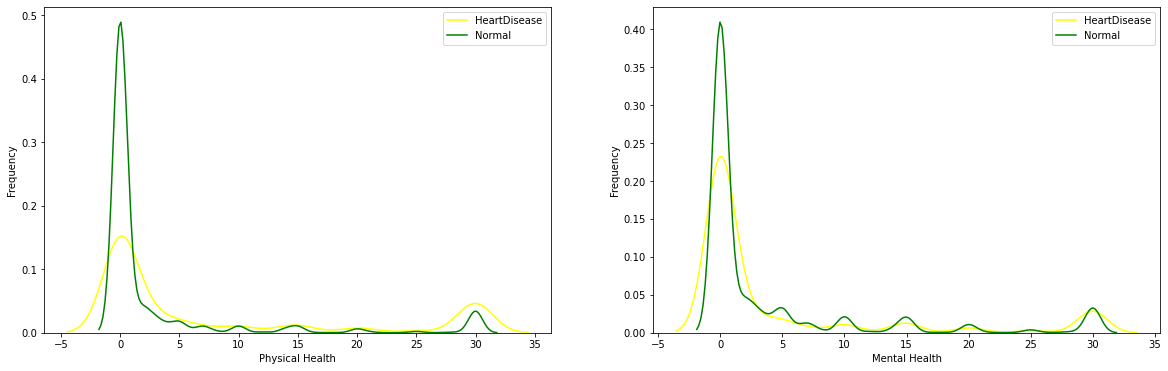

In [23]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,6))
sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], color="yellow", label="HeartDisease", ax=ax1)
sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], color="green", label="Normal", ax=ax1)
sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], color="yellow", label="HeartDisease", ax=ax2)
sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], color="green", label="Normal", ax=ax2)
ax1.set_xlabel("Physical Health")
ax1.set_ylabel("Frequency")
ax2.set_xlabel("Mental Health")
ax2.set_ylabel("Frequency")
ax1.legend()
ax2.legend()
plt.show()

Nesses dois gráficos, vemos que pessoas que não possuíram uma boa saúde fisica e mental nos últimos 30 dias, possuem problemas no coração. Já o grupo de pessoas que tiveram uma boa saúde mental e física nos últimos 30 dias, contém menos casos de pessoas com problema no coração. Isso permite concluir que quem possui uma boa saúde física e mental possui menos chances de adquirir problemas no coração. Sendo assim, essa hipótese é verdadeira.

## Construção de modelos para conseguir prever se uma pessoa tem ou não problemas no coração

### Suport Vector Machines

O modelo de Suport Vector Machines é disponibilizado pela biblioteca scikit-learn e tem como foco achar um hiperplano que consiga dividir melhor os dados.

<img src="img/svm.png" style="width:500px; heigth:700px"/>


In [59]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [25]:
colunas = ["Sex", "Smoking","AlcoholDrinking", "Stroke", "DiffWalking", "AgeCategory",	
"Race",	"Diabetic",	"PhysicalActivity",	"GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]
df_model = pd.get_dummies(df, columns=colunas)

In [26]:
x = df_model.drop('HeartDisease', axis="columns") 
label = df_model['HeartDisease']

In [27]:
X_train, X_test, y_train, y_test= train_test_split(x,label, random_state=42, test_size=0.2)

In [28]:
svm = LinearSVC(class_weight="balanced")

In [29]:
svm.fit(X_train, y_train)

/Users/mariahelenasiqueiradossantos/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced')

In [30]:
y_predict = svm.predict(X_test)

### Classification Report 

In [31]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.55      0.08      0.13      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.53      0.54     63959
weighted avg       0.89      0.91      0.88     63959



### Matriz de Confusão 

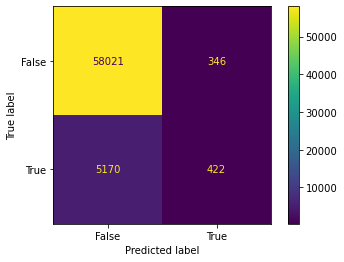

In [32]:
conf = confusion_matrix(y_test, y_predict)
matrix = ConfusionMatrixDisplay(conf, display_labels=['False', 'True'])
matrix.plot()


### Acurácia 

In [33]:
acuracia = accuracy_score(y_test, y_predict)
print(acuracia)

0.9137572507387545


### Regressão Logística

A Regressão Logísitica é um modelo da biblioteca scikit-learn usado para prever uma variável de resultado que seja categórica a partir de variáveis preditoras categóricas ou contínuas.

<img src="img/lr.jpg" style="width:500px; heigth:700px"/>

In [34]:
rl = LogisticRegression(class_weight="balanced")

In [35]:
rl.fit(X_train, y_train)

/Users/mariahelenasiqueiradossantos/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [36]:
y_predict2 = rl.predict(X_test)

### Classification Report 

In [37]:
report = classification_report(y_test, y_predict2)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     58367
           1       0.23      0.78      0.35      5592

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



### Matriz de Confusão 

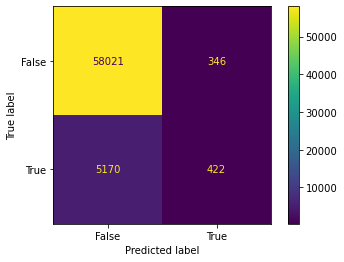

In [38]:
conf = confusion_matrix(y_test, y_predict)
matrix = ConfusionMatrixDisplay(conf, display_labels=['False', 'True'])
matrix.plot()

### Acurácia 

In [39]:
acuracia = accuracy_score(y_test, y_predict)
print(acuracia)

0.9137572507387545


Vemos que ambos os modelos não perfomaram muito bem para encontrar pessoas que possuem problemas cardíacos. Ao analisar o recall e o f1-score dos modelos, vemos que estão muito baixos, apesar da acurácia dos modelos terem sido altas.

## Conclusão

Pode-se notar através da análise dos dados que existem variáveis que podem influenciar mais uma pessoa ter problemas cardíacos, como a falta de exercício físico, por exemplo. O levantamento e comprovação de hipóteses é de extrema importante para que os dados não sejam enviesados.

Além disso, performou-se dois modelos de machine learning que tentam indentificar se uma pessoa possui um problema cardíacos. Foi visto que os modelos perfomaram melhor para identificar pessoas sem problemas cardíacos, mas esse não era o objetivo. 